##### Name - Shunottara Alhat

# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python. 
------------------------------------------------------------

## 2) Salary_hike -> Build a prediction model for Salary_hike¶

In [150]:
# Import Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import pylab
import scipy.stats as st

In [151]:
# Read the Data

Salaryhike = pd.read_csv("D:\Excelr DataScience\DS Assignment\Assignment 4 Simple Linear Regression\Salary_Data.csv")
Salaryhike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [152]:
# EDA , Visualization and Features Engineering

Salaryhike.columns
Salaryhike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

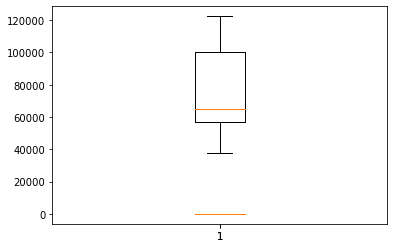

In [153]:

plt.boxplot(Salaryhike.YearsExperience,0,"rs",1)
plt.boxplot(Salaryhike.Salary)

Salaryhike.corr() # # correlation value between X and Y
np.corrcoef(Salaryhike.Salary,Salaryhike.YearsExperience)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

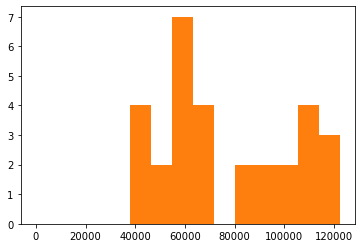

In [154]:
plt.hist(Salaryhike.YearsExperience)
plt.hist(Salaryhike.Salary)

Text(0, 0.5, 'Salary')

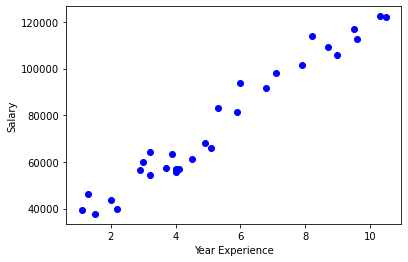

In [155]:
plt.plot(Salaryhike.YearsExperience,Salaryhike.Salary,"bo");
plt.xlabel("Year Experience");plt.ylabel("Salary")


In [156]:
# For preparing linear regression model we need to import the statsmodels.formula.api
# MODEL BUILDING

model=smf.ols("Salary ~ YearsExperience",data=Salaryhike).fit()

In [157]:
# For getting coefficients of the varibles used in equation
# MODEL TESTING

model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [158]:
# P-values for the variables and R-squared value for prepared model
model.summary()

model.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [159]:
pred = model.predict(Salaryhike.iloc[:,0]) # Predicted values of Salary using the model

0.9782416184887601

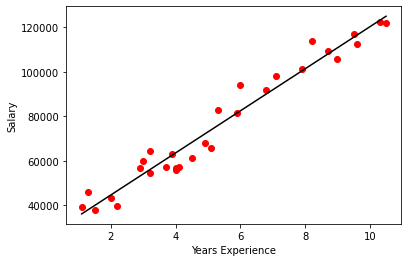

In [160]:
# Visualization of regresion line over the scatter plot of YearsExperience and Salary
# For visualization we need to import matplotlib.pyplot

plt.scatter(x=Salaryhike['YearsExperience'],y=Salaryhike['Salary'],color='red');
plt.plot(Salaryhike['YearsExperience'],pred,color='black');
plt.xlabel('Years Experience');plt.ylabel('Salary')

pred.corr(Salaryhike.Salary) # 

                                    0             1
Intercept                  679.965646  29175.977894
np.log(YearsExperience)  31815.666558  49348.309362


Text(0, 0.5, 'Salary')

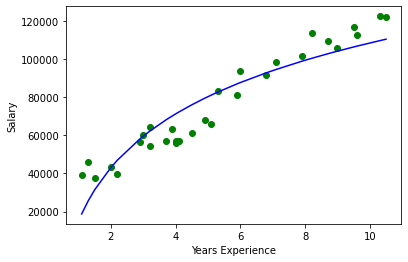

In [161]:
# LOG
# Transforming variables for accuracy
model2 = smf.ols('Salary~np.log(YearsExperience)',data=Salaryhike).fit()
model2.params
model2.summary()
print(model2.conf_int(0.01)) # 99% confidence level
pred2 = model2.predict(pd.DataFrame(Salaryhike['YearsExperience']))
pred2.corr(Salaryhike.Salary)

pred2
plt.scatter(x=Salaryhike['YearsExperience'],y=Salaryhike['Salary'],color='green');
plt.plot(Salaryhike['YearsExperience'],pred2,color='blue');
plt.xlabel('Years Experience');plt.ylabel('Salary')

                         0          1
Intercept        10.401175  10.613629
YearsExperience   0.107752   0.143153


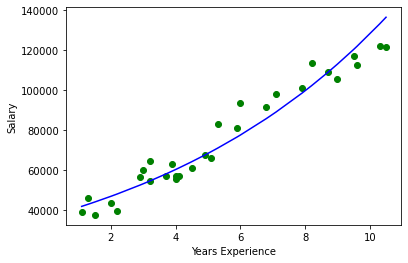

In [162]:
# LOG
# Exponential transformation
model3 = smf.ols('np.log(Salary)~YearsExperience',data=Salaryhike).fit()
model3.params
model3.summary()
print(model3.conf_int(0.01)) # 99% confidence level
pred_log = model3.predict(pd.DataFrame(Salaryhike['YearsExperience']))
pred_log
pred3=np.exp(pred_log)  # as we have used log(Salary) in preparing model so we need to convert it back
pred3
pred3.corr(Salaryhike.Salary)
plt.scatter(x=Salaryhike['YearsExperience'],y=Salaryhike['Salary'],color='green');
plt.plot(Salaryhike.YearsExperience,np.exp(pred_log),color='blue');
plt.xlabel('Years Experience');plt.ylabel('Salary')
resid_3 = pred3-Salaryhike.Salary

In [163]:
# getting residuals of the entire data set
resid = model3.resid_pearson 
resid

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])

Text(0, 0.5, 'Actual')

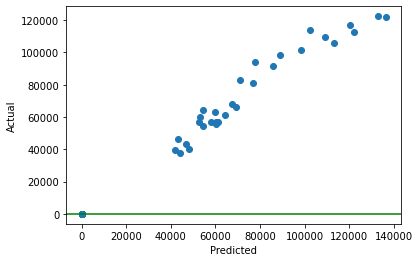

In [164]:

plt.plot(model3.resid_pearson,'o');
plt.axhline(y=0,color='green');
plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

# Predicted vs actual values
plt.scatter(x=pred3,y=Salaryhike.Salary);
plt.xlabel("Predicted");plt.ylabel("Actual")

In [165]:
# Quadratic model  (SQ)
Salaryhike["YearsExperience_Sq"] = Salaryhike.YearsExperience * Salaryhike.YearsExperience
model_quad = smf.ols("Salary ~ YearsExperience + YearsExperience_Sq",data=Salaryhike).fit()
model_quad.params
model_quad.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           3.59e-19
Time:                        01:37:13   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience     9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YearsExperience_Sq    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

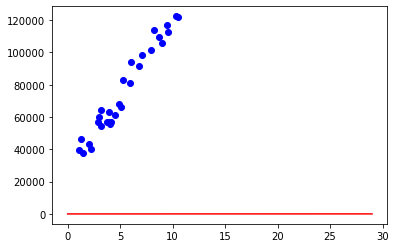

In [166]:

model_quad.conf_int(0.05) # 
plt.scatter(Salaryhike.YearsExperience,Salaryhike.Salary,c="b");plt.plot(Salaryhike.YearsExperience,"r")


(array([6., 3., 3., 3., 6., 2., 1., 2., 2., 2.]),
 array([-1.32942469, -0.99999975, -0.6705748 , -0.34114986, -0.01172492,
         0.31770002,  0.64712497,  0.97654991,  1.30597485,  1.63539979,
         1.96482474]),
 <BarContainer object of 10 artists>)

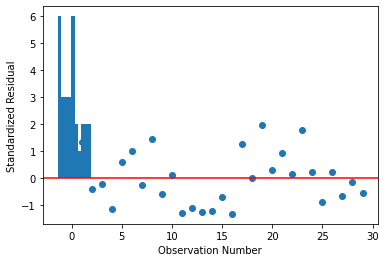

In [167]:
plt.scatter(np.arange(30),model_quad.resid_pearson);
plt.axhline(y=0,color='red');
plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

plt.hist(model_quad.resid_pearson) # histogram for residual values 

25792.20019866871

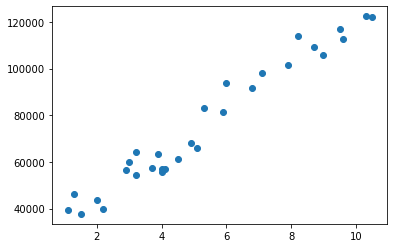

In [168]:
####### Implementing the Linear Regression model from sklearn library

plt.scatter(Salaryhike.YearsExperience,Salaryhike.Salary)
model1 = LinearRegression()
model1.fit(Salaryhike.YearsExperience.values.reshape(-1,1),Salaryhike.Salary)
pred1 = model1.predict(Salaryhike.YearsExperience.values.reshape(-1,1))

# Adjusted R-Squared value
model1.score(Salaryhike.YearsExperience.values.reshape(-1,1),Salaryhike.Salary)# 
rmse1 = np.sqrt(np.mean((pred1-Salaryhike.Salary)**2)) #
model1.coef_
model1.intercept_

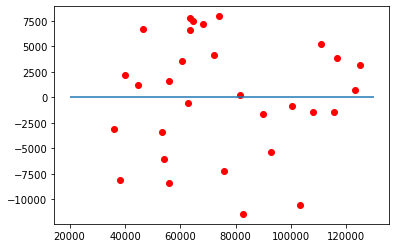

In [169]:
#### Residuals Vs Fitted values

plt.scatter(pred1,(pred1-Salaryhike.Salary),c="r")
plt.hlines(y=0,xmin=20000,xmax=130000) 


(array([2., 2., 2., 1., 2., 6., 3., 4., 2., 6.]),
 array([-11448.0258726 ,  -9507.42248153,  -7566.81909046,  -5626.21569939,
         -3685.61230832,  -1745.00891726,    195.59447381,   2136.19786488,
          4076.80125595,   6017.40464702,   7958.00803809]),
 <BarContainer object of 10 artists>)

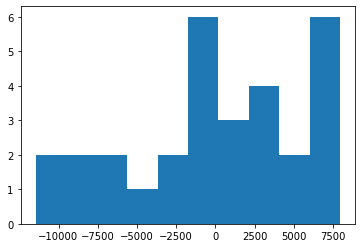

In [170]:
# checking normal distribution for residual
plt.hist(pred1-Salaryhike.Salary)

In [171]:
### Fitting Quadratic Regression 
# (SQRT)
Salaryhike["YearsExperience_sqrd"] = Salaryhike.YearsExperience*Salaryhike.YearsExperience
model2 = LinearRegression()
model2.fit(X = Salaryhike.iloc[:,[0,2]],y=Salaryhike.Salary)
pred2 = model2.predict(Salaryhike.iloc[:,[0,2]])

In [172]:
# Adjusted R-Squared value
model2.score(Salaryhike.iloc[:,[0,2]],Salaryhike.Salary)# 
rmse2 = np.sqrt(np.mean((pred2-Salaryhike.Salary)**2)) # 
model2.coef_
model2.intercept_

26214.932677059587

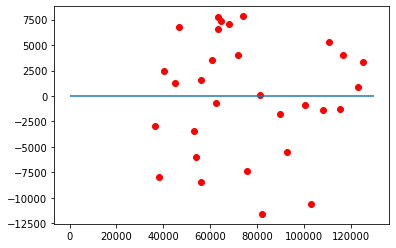

In [173]:
#### Residuals Vs Fitted values

plt.scatter(pred2,(pred2-Salaryhike.Salary),c="r")
plt.hlines(y=0,xmin=0,xmax=130000)  

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-11579.23160621, -10568.70328032,  -8432.49900158,  -7925.2948312 ,
          -7338.39552754,  -6009.68256145,  -5490.80244851,  -3437.2825644 ,
          -2923.02004067,  -1801.94461653,  -1419.54415082,  -1311.44127464,
           -915.66454211,   -642.52922522,     52.33285105,    933.64408643,
           1274.07071874,   1567.50099842,   2409.74178358,   3372.69393997,
           3509.69729633,   3979.79691585,   4041.00924659,   5294.2855428 ,
           6557.34929099,   6773.69725209,   7102.65964195,   7372.55565853,
           7720

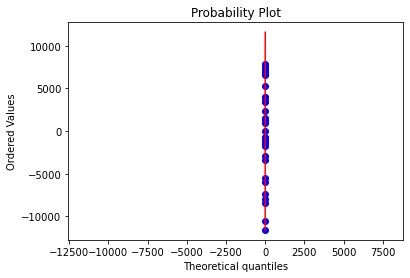

In [174]:
# Checking normal distribution
plt.hist(pred2-Salaryhike.Salary)

st.probplot(pred2-Salaryhike.Salary,dist="norm",plot=pylab)

In [175]:
# Let us prepare a model by applying transformation on dependent variable
Salaryhike["Salary_sqrt"] = np.sqrt(Salaryhike.Salary)

model3 = LinearRegression()
model3.fit(X = Salaryhike.iloc[:,[0,2]],y=Salaryhike.Salary_sqrt)
pred3 = model3.predict(Salaryhike.iloc[:,[0,2]])

In [176]:
# Adjusted R-Squared value
model3.score(Salaryhike.iloc[:,[0,2]],Salaryhike.Salary_sqrt)# 
rmse3 = np.sqrt(np.mean(((pred3)**2-Salaryhike.Salary)**2)) # 
model3.coef_
model3.intercept_

169.8087529382861

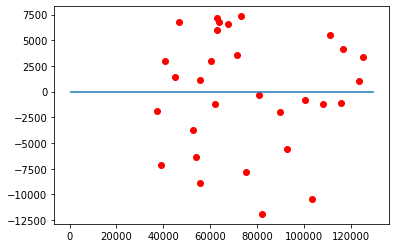

In [177]:
#### Residuals Vs Fitted values

plt.scatter((pred3)**2,((pred3)**2-Salaryhike.Salary),c="r")
plt.hlines(y=0,xmin=0,xmax=130000)  

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-11903.66559887, -10412.35581775,  -8850.17134139,  -7802.44700432,
          -7137.49206633,  -6365.24096784,  -5552.72464198,  -3756.86998393,
          -1935.62436397,  -1914.72053895,  -1207.13358311,  -1184.63606668,
          -1096.82901194,   -808.37052792,   -294.37698233,   1010.48148507,
           1149.82865861,   1443.54622547,   2989.51363219,   2997.22880675,
           3389.0400768 ,   3520.69723584,   4185.58323899,   5521.61096137,
           6007.98770764,   6550.32832533,   6806.89840384,   6818.28451061,
           7170

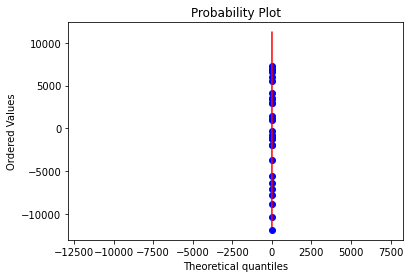

In [178]:
# checking normal distribution for residuals 
plt.hist((pred3)**2-Salaryhike.Salary)
st.probplot((pred3)**2-Salaryhike.Salary,dist="norm",plot=pylab)

In [179]:
# Let us prepare a model by applying transformation on dependent variable without transformation on input variables 
model4 = LinearRegression()
model4.fit(X = Salaryhike.YearsExperience.values.reshape(-1,1),y=Salaryhike.Salary_sqrt)
pred4 = model4.predict(Salaryhike.YearsExperience.values.reshape(-1,1))

In [180]:
# Adjusted R-Squared value
model4.score(Salaryhike.YearsExperience.values.reshape(-1,1),Salaryhike.Salary_sqrt)# 
rmse4 = np.sqrt(np.mean(((pred4)**2-Salaryhike.Salary)**2)) # 
model4.coef_
model4.intercept_

180.70022140543102

(array([1., 2., 1., 2., 3., 4., 3., 3., 4., 7.]),
 array([-13828.69028846, -11672.72400793,  -9516.75772739,  -7360.79144686,
         -5204.82516632,  -3048.85888579,   -892.89260525,   1263.07367528,
          3419.03995582,   5575.00623635,   7730.97251689]),
 <BarContainer object of 10 artists>)

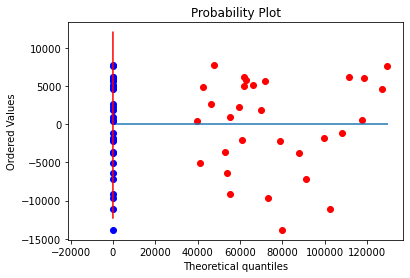

In [181]:
#### Residuals Vs Fitted values

plt.scatter((pred4)**2,((pred4)**2-Salaryhike.Salary),c="r")
plt.hlines(y=0,xmin=0,xmax=130000)  

st.probplot((pred4)**2-Salaryhike.Salary,dist="norm",plot=pylab)

# Checking normal distribution for residuals 
plt.hist((pred4)**2-Salaryhike.Salary)


In [208]:
# Prediction
# Predicted values of Salary using the model

new_data=pd.Series([2,6])
new_data

0    2
1    6
dtype: int64

In [213]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,2
1,6


In [214]:
model.predict(data_pred)

0    44692.124842
1    82491.974127
dtype: float64